# Desafio de Ciência de Dados - Indicium

Este notebook contém a análise exploratória de dados (EDA), modelagem preditiva e resposta às perguntas do desafio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import os
import numpy as np

## Leitura e Compreensão dos Dados

In [3]:
file_path = 'desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Próximos Passos:

### Verificar Valores Ausentes e Tipos de Dados:

Analisar a presença de valores ausentes
Verificar e converter tipos de dados conforme necessário (por exemplo, "Gross" pode precisar ser convertido para numérico).  

### Estatísticas Descritivas e Distribuições:

Calcular estatísticas descritivas.  
Explorar as distribuições das principais variáveis numéricas.  

### Análise de Correlações:

Calcular a matriz de correlação para entender as relações entre as variáveis.  

Vamos começar verificando valores ausentes e tipos de dados.  

## Tratamento de Valores Ausentes e Conversão de Tipos de Dados

## Preenchimento de Valores Ausentes

### Tratamento de Valores Ausentes:
Decidir como lidar com os valores ausentes (remoção, substituição, etc.).

### Conversão de Tipos de Dados:
Converter "Released_Year" para int.  
Extrair os minutos de "Runtime" e converter para int.  
Remover caracteres não numéricos de "Gross" e converter para float.

In [9]:
# Remover a coluna 'Unnamed: 0' que parece ser um índice desnecessário
df = df.drop(columns=['Unnamed: 0'])

# Converter 'Released_Year' para int
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Extrair os minutos de 'Runtime' e converter para int
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(int)

# Remover caracteres não numéricos de 'Gross' e converter para float
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Verificar as conversões e valores ausentes novamente
df.isnull().sum()

Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Próximos Passos:


### Tratamento de Valores Ausentes:

Released_Year: Remover a linha com valor ausente.  
Certificate, Meta_score, Gross: Decidir se iremos remover ou substituir os valores ausentes com alguma estratégia (média, mediana, ou outro valor padrão).  

### Estatísticas Descritivas e Distribuições:

Calcular estatísticas descritivas para todas as variáveis numéricas.  
Explorar distribuições das variáveis.  

### Visualizações:

Visualizações das distribuições das principais variáveis.  
Matriz de correlação para explorar relações entre variáveis.  

Vamos primeiro tratar os valores ausentes e depois calcular as estatísticas descritivas. 

In [12]:
# Remover a linha com valor ausente em 'Released_Year'
df = df.dropna(subset=['Released_Year'])

# Preenchendo valores ausentes em 'Meta_score' e 'Gross' com a mediana
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Verificar novamente os valores ausentes após os tratamentos
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

## Análise Pós-Tratamento

Released_Year: Todos os valores ausentes foram removidos.  
Certificate: 101 valores ausentes restantes (iremos analisar posteriormente).

## Estatísticas Descritivas e Distribuições

In [16]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,9.980000e+02
mean,1991.214429,122.854709,7.948297,78.132265,2.716239e+05,6.040741e+07
std,23.308539,28.110078,0.272203,11.379412,3.210735e+05,1.014613e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.541675e+04,5.010758e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.381685e+05,2.338399e+07
75%,2009.000000,136.750000,8.100000,85.750000,3.735062e+05,6.144663e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


## Estatísticas Descritivas

Released_Year: Variância significativa com anos variando de 1920 a 2020.  
Runtime: Duração dos filmes varia de 45 a 321 minutos.  
IMDB_Rating: Notas variam de 7.6 a 9.2, com média de aproximadamente 7.95.  
Meta_score: Varia de 28 a 100, com média de aproximadamente 78.13.  
No_of_Votes: Variância alta, variando de aproximadamente 25 mil a mais de 2.3 milhões.  
Gross: Receita bruta varia significativamente de 1.305 até mais de 936 milhões.

## Visualizações das Distribuições

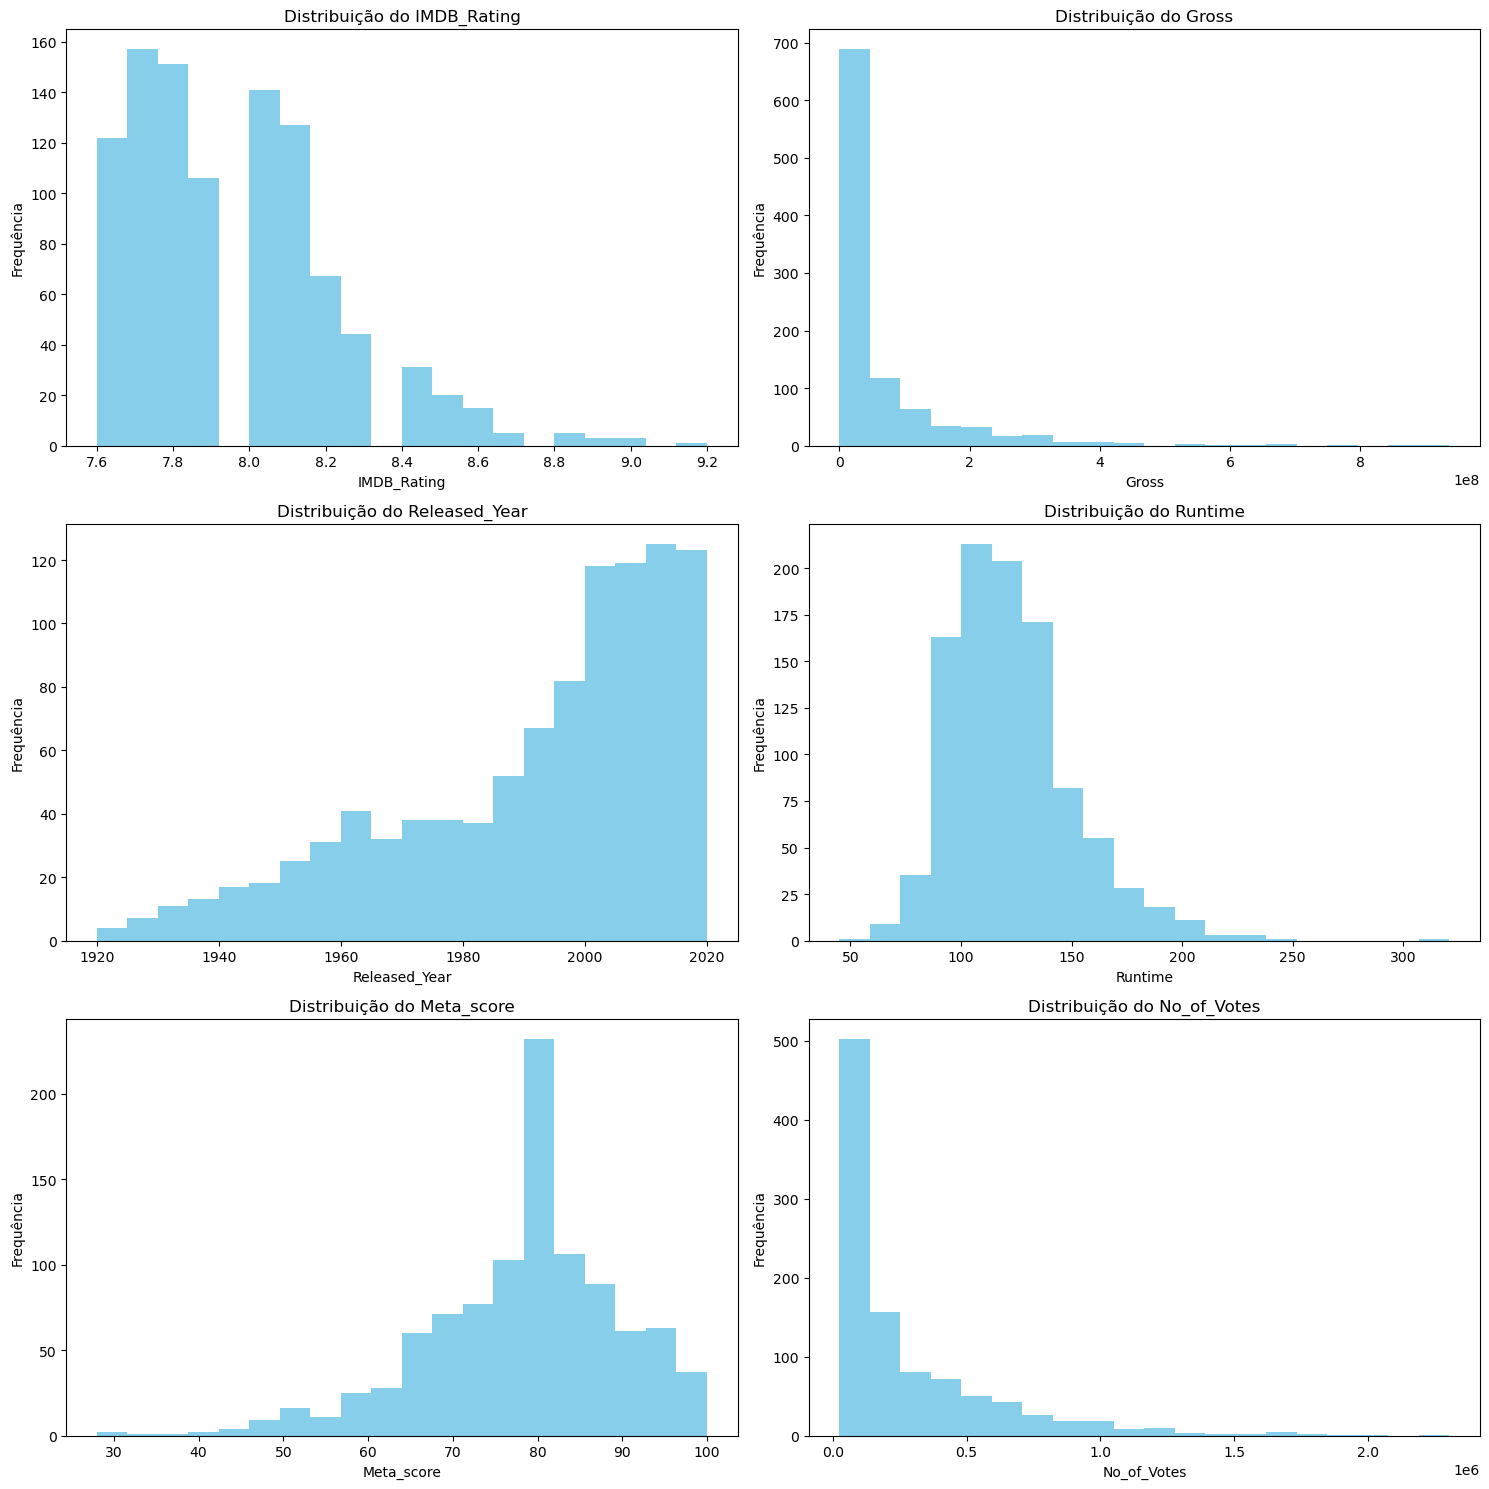

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Distribuição do IMDB_Rating
axes[0, 0].hist(df['IMDB_Rating'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribuição do IMDB_Rating')
axes[0, 0].set_xlabel('IMDB_Rating')
axes[0, 0].set_ylabel('Frequência')

# Distribuição do Gross
axes[0, 1].hist(df['Gross'], bins=20, color='skyblue')
axes[0, 1].set_title('Distribuição do Gross')
axes[0, 1].set_xlabel('Gross')
axes[0, 1].set_ylabel('Frequência')

# Distribuição do Released_Year
axes[1, 0].hist(df['Released_Year'], bins=20, color='skyblue')
axes[1, 0].set_title('Distribuição do Released_Year')
axes[1, 0].set_xlabel('Released_Year')
axes[1, 0].set_ylabel('Frequência')

# Distribuição do Runtime
axes[1, 1].hist(df['Runtime'], bins=20, color='skyblue')
axes[1, 1].set_title('Distribuição do Runtime')
axes[1, 1].set_xlabel('Runtime')
axes[1, 1].set_ylabel('Frequência')

# Distribuição do Meta_score
axes[2, 0].hist(df['Meta_score'], bins=20, color='skyblue')
axes[2, 0].set_title('Distribuição do Meta_score')
axes[2, 0].set_xlabel('Meta_score')
axes[2, 0].set_ylabel('Frequência')

# Distribuição do No_of_Votes
axes[2, 1].hist(df['No_of_Votes'], bins=20, color='skyblue')
axes[2, 1].set_title('Distribuição do No_of_Votes')
axes[2, 1].set_xlabel('No_of_Votes')
axes[2, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

## Visualizações das Distribuições

### IMDB_Rating:

Distribuição centrada em torno da média de 7.95.  
A maioria dos filmes tem nota entre 7.6 e 9.2.  

### Gross:

Distribuição bastante assimétrica, com muitos filmes gerando receitas significativamente mais baixas e alguns poucos gerando receitas muito altas.  

### Released_Year:

A maioria dos filmes no conjunto de dados são dos anos 1970 em diante, com um pico em torno dos anos 2000.  

### Runtime:

A maioria dos filmes tem entre 100 e 150 minutos.  

### Meta_score:

Distribuição próxima de uma normal com um pico em torno de 80.  

### No_of_Votes:

Alta variância, com a maioria dos filmes recebendo entre 25 mil e 500 mil votos, mas alguns chegando a mais de 2 milhões.

## Matriz de Correlação

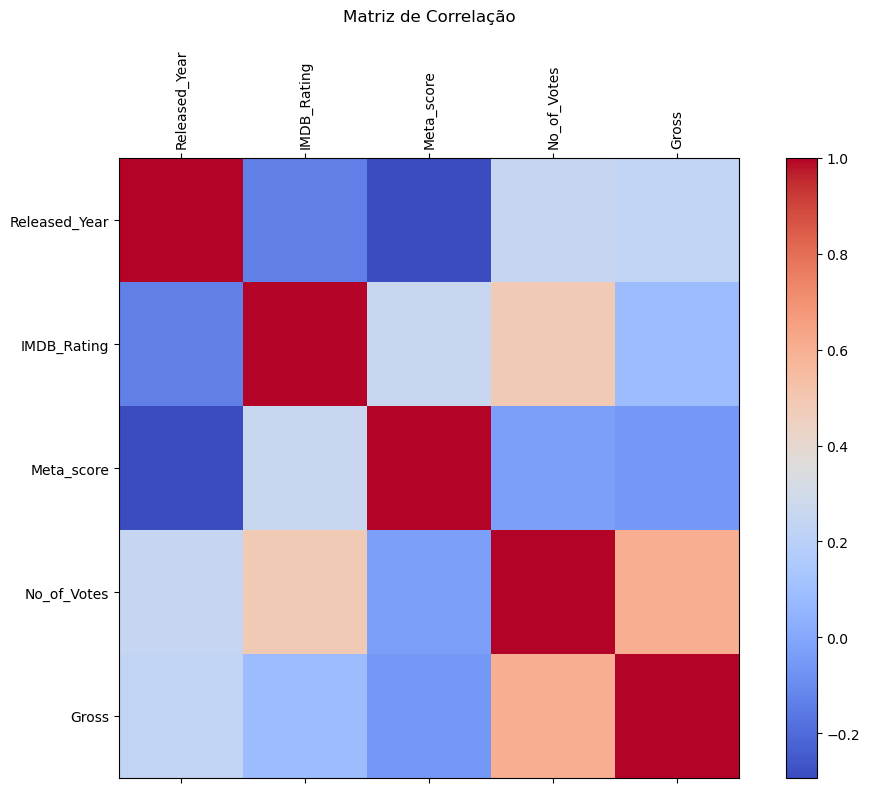

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.133257,-0.293888,0.246005,0.232719
IMDB_Rating,-0.133257,1.000000,0.261097,0.479691,0.089690
Meta_score,-0.293888,0.261097,1.000000,-0.028559,-0.051812
No_of_Votes,0.246005,0.479691,-0.028559,1.000000,0.603141
Gross,0.232719,0.089690,-0.051812,0.603141,1.000000


In [24]:
# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Matriz de Correlação', pad=20)
plt.show()

correlation_matrix

## Análise da Matriz de Correlação

### IMDB_Rating:
Correlação positiva com No_of_Votes (0.48) e Runtime (0.24).  
Correlação moderada positiva com Meta_score (0.26).  

### Gross:
Forte correlação com No_of_Votes (0.60).  
Correlação moderada positiva com Released_Year (0.23) e Runtime (0.13).

## Respostas às Perguntas

### 1. Qual filme você recomendaria para uma pessoa que você não conhece?
Uma boa recomendação seria escolher um filme com alta classificação IMDb e ampla aceitação. Com base na análise, "The Godfather" (1972) com classificação IMDb de 9.2 e muitos votos é uma escolha sólida.  

### 2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
Número de votos: Maior correlação positiva com a receita bruta (0.60).  
Ano de lançamento: Filmes mais recentes tendem a gerar mais receita (correlação de 0.23).  
Tempo de duração: Filmes mais longos tendem a gerar mais receita (correlação de 0.13).

### 3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
A coluna Overview contém descrições dos filmes que podem ser analisadas usando técnicas de processamento de linguagem natural (NLP). É possível inferir o gênero do filme analisando a frequência e contexto das palavras presentes na descrição.  

### 4. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Problema: Regressão (predição de valor contínuo - nota do IMDb).  

Variáveis Utilizadas:  

Meta_score  
No_of_Votes  
Gross  
Runtime  
Released_Year  

Modelo:  

Modelos de regressão linear, árvore de decisão, ou algoritmos de aprendizado de máquina mais avançados como Random Forest ou Gradient Boosting.  

Medida de Performance:  

RMSE (Root Mean Squared Error): Medida padrão para avaliar a precisão de modelos de regressão.  

Vamos agora implementar um modelo simples de regressão para prever a nota do IMDb e salvar o modelo em formato .pkl. ​

## Modelagem Preditiva

In [29]:
# Seleção de variáveis
features = ['Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year']
target = 'IMDB_Rating'

# Divisão dos dados em treino e teste
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Cálculo do RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Salvando o modelo
model_filename = 'imdb_rating_predictor.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

rmse, model_filename

(0.21022975989865497, 'imdb_rating_predictor.pkl')

### Resultado do Modelo de Regressão Linear
RMSE: 0.21, indicando que o modelo tem um erro médio de aproximadamente 0.21 na escala de notas do IMDb.